# 주가 획득과 가공


## (1) 기본 
* 주가 데이터 획득
* 주가 그래프 표시: 기본차트, 봉차트
* finance-datareader 와 pandas-datareader 비교
* 여러 종목 한꺼번에 받기
* 종목간 주가 상관관계
* 종목간 주가 맞추기(정규화, normalization)

## (2) 응용
* 여러 종목 주가 받기 (100종목 이상)
* 데이터 전처리, 데이터 가공
* 데이터 저장하기

###### 18/10/25, by 김도완

In [30]:
# Finance DataReader 사용시 설정
# 한국/미국주식가격, 지수, 환율, 암호화폐가격, 종목리스팅 등 금융 데이터 수집 라이브러리
# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# pip install finance-datareader

# 차트설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"]= 'nanummyeongjo'
#plt.rcParams["font.family"]= 'DejaVu Sans'
plt.rcParams["figure.figsize"]= (14,4)
#plt.rcParams['lines.linewidth']= 2
plt.rcParams["axes.grid"]= True


In [2]:
# FinanceDataReader 사용시 설정
import FinanceDataReader as fdr
fdr.__version__

'0.6.0'

In [3]:
# 종목코드얻기
# KRX 종목전체, KOSPI 코스피종목, KOSDAQ 코스닥종목
stock_code= fdr.StockListing('KRX')
print('종목개수:', len(stock_code)) # 종목개수 확인
stock_code.to_excel('./종목코드모음.xlsx') # 엑셀파일로 저장
stock_code.head()

종목개수: 2216


,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입"
2,012630,HDC,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업"
3,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
4,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"


In [3]:
# 가격데이터
df= fdr.DataReader('005930', '2018') # 삼성전자
df.head(5)
# 수정주가 없음, 공휴일 주가 삭제필요

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,51020,51380,51400,50780,8460000.0,0.0012
2018-01-03,51620,52540,52560,51420,9920000.0,0.0118
2018-01-04,51080,52120,52180,50640,11640000.0,-0.0105
2018-01-05,52120,51300,52120,51200,9330000.0,0.0204
2018-01-08,52020,52400,52520,51500,8360000.0,-0.0019


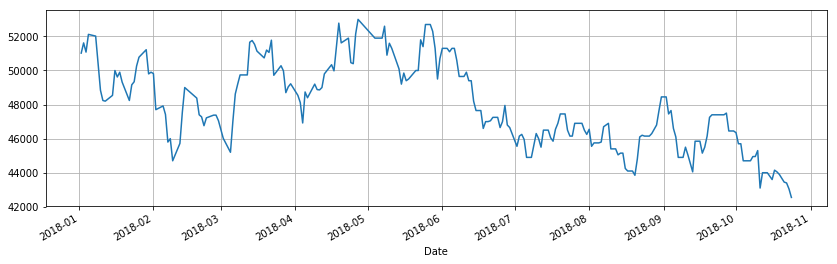

In [19]:
# 주가 그래프 그리기
df['Close'].plot()
#df['Open'].plot()

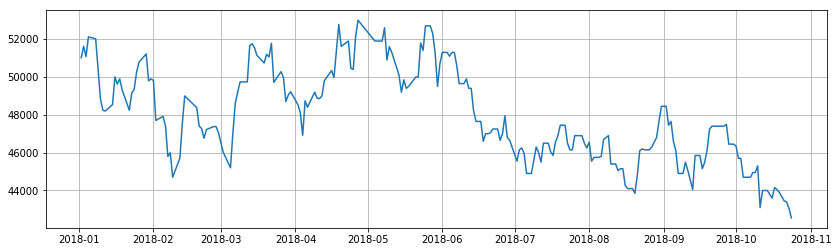

In [18]:
# # 주가 그래프 그리기 정석
fig= plt.figure(figsize=(14,4)) # Figure 객체를 만든다.
ax= fig.add_subplot(1,1,1) # AxesSubplot객체를 만든다.
ax.plot(df.index, df['Close']) # AxesSubplot에서 plot을 불러와 그래프를 그린다.
plt.show()

# plt.plot() 만으로 가능한이유는 자동으로 가장 최근에 생성된 Figure객체를 찾고 해당 Figure객체내의 AxesSubplot에 그래프를 그리기 때문
# Figure 와 AxesSubplot객체가 없다면 자동으로 하나 생성

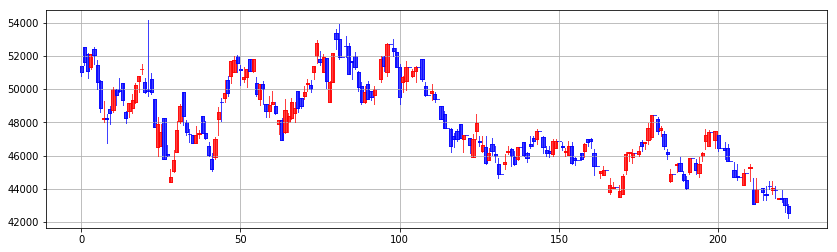

In [29]:
# 봉차트로 주가 표현
#import matplotlib.finance # 없어질 예정 mpl-finance 를 사용하라.
import mpl_finance

fig= plt.figure(figsize=(14,4))
ax= fig.add_subplot(1,1,1)
mpl_finance.candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], width=1, colorup='r', colordown='b', alpha=0.75)
plt.show()


In [39]:
# pandas_datareader 사용해 주가 데이터 받기
# 야후 파이낸스 사용 안정성 떨어짐. 불안하다.

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import fix_yahoo_finance as yf # 야후 파이낸스이용시 패치필요

yf.pdr_override()

#한꺼번에 주석처리 ctrl+/
print(pd.__version__)
print(pdr.__version__)

start_date= pd.to_datetime('2018-01-01')
end_date= pd.to_datetime('2018-10-12')
HY= pdr.data.get_data_yahoo('005930.KS', start_date, end_date)
#HY['Adj Close'].tail(5)
HY.tail(5)


0.22.0
0.5.0
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-05,44800.0,45500.0,44550.0,44700.0,44700.0,10544165
2018-10-08,44200.0,45200.0,44200.0,44950.0,44950.0,6759464
2018-10-10,45250.0,45500.0,44500.0,45300.0,45300.0,10341349
2018-10-11,44000.0,44650.0,43100.0,43100.0,43100.0,19324537
2018-10-12,43200.0,44650.0,43200.0,44000.0,44000.0,12640906


In [40]:
HY['Adj Close'].tail(5) # 수정주가 있음.
# 수정주가란? 
# 주가는 유무상증자, 배당, 액면분할등이 생길 때 연속성을 잃고 단층을 보이게 된다. 
# 이경우 이전주가와 현재의 주가를 비교하는데 애로가 따르게 된다.
# 따라서 주가에 연속성을 부여하기 위해 일정한 수정을 할수있는데, 이것을 수정주가라 한다.


Date
2018-10-05    44700.0
2018-10-08    44950.0
2018-10-10    45300.0
2018-10-11    43100.0
2018-10-12    44000.0
Name: Adj Close, dtype: float64

In [33]:
len(HY)

189

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


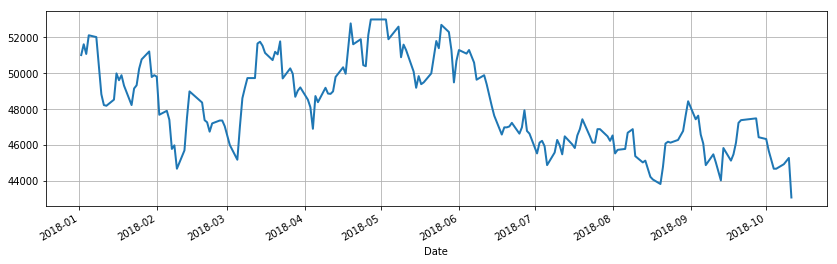

In [34]:
HY['Close'].plot()

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


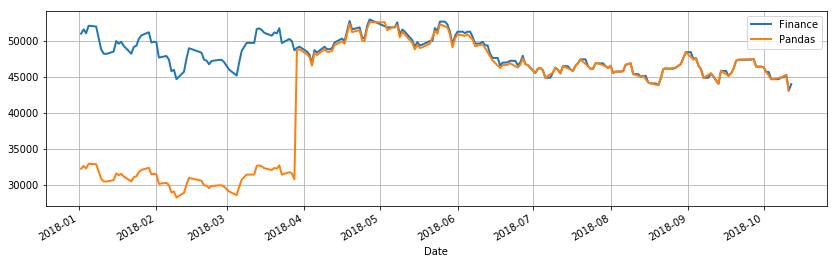

In [37]:
df['Close'].plot() #FinanceDataReader 사용
HY['Adj Close'].plot() #pandas_datareader 사용
plt.legend(['Finance', 'Pandas'])
plt.show()

In [41]:
# 여러 종목 한꺼번에 받기
start_date= pd.to_datetime('2018-01-01')
end_date= pd.to_datetime('2018-10-12')
HY= pdr.data.get_data_yahoo(['005930.KS', '005380.KS'], start_date, end_date)
HY['Adj Close'].tail(5)

[*********************100%***********************]  2 of 2 downloaded


,005380.KS,005930.KS
Date,,
2018-10-05,124500.0,44700.0
2018-10-08,122000.0,44950.0
2018-10-10,120000.0,45300.0
2018-10-11,116000.0,43100.0
2018-10-12,115500.0,44000.0


In [46]:
HY # 패널형태

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 189 (major_axis) x 2 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2018-01-02 00:00:00 to 2018-10-11 00:00:00
Minor_axis axis: 005380.KS to 005930.KS

In [53]:
HY.minor_xs('005930.KS').tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-04,45150.0,45600.0,44700.0,44700.0,44700.0,11865327.0
2018-10-05,44800.0,45500.0,44550.0,44700.0,44700.0,10544165.0
2018-10-08,44200.0,45200.0,44200.0,44950.0,44950.0,6759464.0
2018-10-10,45250.0,45500.0,44500.0,45300.0,45300.0,10341349.0
2018-10-11,44000.0,44650.0,43100.0,43100.0,43100.0,19324537.0


In [44]:
HY.minor_xs('005930.KS')['Open'].tail()

Date
2018-10-05    44800.0
2018-10-08    44200.0
2018-10-10    45250.0
2018-10-11    44000.0
2018-10-12    43200.0
Name: Open, dtype: float64

In [130]:
# 여러 종목 한꺼번에 받기, 딕셔너리 이용

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import fix_yahoo_finance as yf

yf.pdr_override()

#한꺼번에 주석처리 ctrl+/
print(pd.__version__)
print(pdr.__version__)

all_data= {}
for ticker in ['005930.KS', '005380.KS', '000660.KS']: # 삼성전자, 현대차, sk하이닉스
    all_data[ticker]= pdr.data.get_data_yahoo(ticker, '2018-06-01', '2018-10-11')

all_data['005930.KS'].tail() #딕셔너리 타입, value는 dataframe이 된다.

0.22.0
0.5.0
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-04,45150.0,45600.0,44700.0,44700.0,44700.0,11865327
2018-10-05,44800.0,45500.0,44550.0,44700.0,44700.0,10544165
2018-10-08,44200.0,45200.0,44200.0,44950.0,44950.0,6759464
2018-10-10,45250.0,45500.0,44500.0,45300.0,45300.0,10341349
2018-10-11,44000.0,44650.0,43100.0,43100.0,43100.0,19324537


In [132]:
print(len(all_data['005930.KS']))
print(len(all_data['005380.KS']))
print(len(all_data['000660.KS']))

87
87
87


In [88]:
# 딕셔너리 keys(), values(), items()
# items()함수는 해당 딕셔너리에서 key와 value를 튜플쌍으로 한 dict_items형태로 가져온다.
#튜플로 dataframe생성
# ({'삼성전자':all_data['005930.KS']['Close']})
# ({tic:all_data[tic]['Close'] for tic in all_data.keys()}) 와 동일

price= pd.DataFrame({tic:data['Close'] for tic, data in all_data.items()})  
volume= pd.DataFrame({tic:data['Volume'] for tic, data in all_data.items()})
returns_price= price.pct_change() #퍼센트 변화율을 계산한다.
returns_volume= volume.pct_change()

In [89]:
#returns_price['005930.KS'].corr(returns['005380.KS'])
returns_price.corr()
#상관관계 구하기
#sk하이닉스는 삼성전자 > 현대차, 현대차는 하이닉스,삼성전자 상관없음, 삼성전자는 SK하이닉스>현대차

,000660.KS,005380.KS,005930.KS
000660.KS,1.000000,-0.109802,0.635184
005380.KS,-0.109802,1.000000,-0.000139
005930.KS,0.635184,-0.000139,1.000000


In [90]:
returns_volume.corr()

,000660.KS,005380.KS,005930.KS
000660.KS,1.000000,0.255463,0.392210
005380.KS,0.255463,1.000000,0.269438
005930.KS,0.392210,0.269438,1.000000


In [91]:
price.corr()
#sk하이닉스는 삼성전자 > 현대차, 현대차는 하이닉스<삼성전자 삼성전자는 SK하이닉스<현대차

,000660.KS,005380.KS,005930.KS
000660.KS,1.000000,-0.11407,0.415906
005380.KS,-0.114070,1.00000,0.665970
005930.KS,0.415906,0.66597,1.000000


In [92]:
price.corrwith(volume)

000660.KS   -0.180076
005380.KS    0.131361
005930.KS    0.142443
dtype: float64

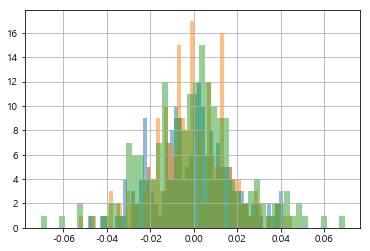

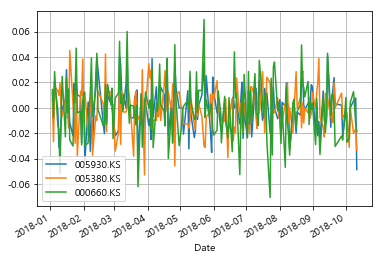

In [115]:
# 변화율 히스토그램
returns_price['005930.KS'].hist(bins=50, alpha=0.5)
returns_price['005380.KS'].hist(bins=50, alpha=0.5)
returns_price['000660.KS'].hist(bins=50, alpha=0.5) #normed=True
#plt.legend(['005930.KS', '005380.KS', '000660.KS'])
plt.show()

# 변화율 그래프
returns_price['005930.KS'].plot()
returns_price['005380.KS'].plot()
returns_price['000660.KS'].plot()
plt.legend()
plt.grid()
plt.show()

In [95]:
# 1월2일 주가를 기준으로 정규화
price.head()
price['sk하이닉스']= price['000660.KS'] / price['000660.KS'][0] #price.iloc[0,0]
price.head()

,000660.KS,005380.KS,005930.KS,sk하이닉스
Date,,,,
2018-01-02,76600.0,149500.0,51020.0,1.000000
2018-01-03,77700.0,150500.0,51620.0,1.014360
2018-01-04,77100.0,146500.0,51080.0,1.006527
2018-01-05,79300.0,149000.0,52120.0,1.035248
2018-01-08,78200.0,151000.0,52020.0,1.020888


In [99]:
price.drop(['sk하이닉스'], inplace=True, axis=1)

In [66]:
returns_price['sk하이닉스']= price['000660.KS'] / price['000660.KS'][0] #price.iloc[0,0]
returns_price['현대차']= price['005380.KS'] / price['005380.KS'][0]
returns_price['삼성전자']= price['005930.KS'] / price['005930.KS'][0]
returns_price.head()

,000660.KS,005380.KS,005930.KS,sk하이닉스,현대차,삼성전자
Date,,,,,,
2018-01-02,NaN,NaN,NaN,1.000000,1.000000,1.000000
2018-01-03,0.014360,0.006689,0.011760,1.014360,1.006689,1.011760
2018-01-04,-0.007722,-0.026578,-0.010461,1.006527,0.979933,1.001176
2018-01-05,0.028534,0.017065,0.020360,1.035248,0.996656,1.021560
2018-01-08,-0.013871,0.013423,-0.001919,1.020888,1.010033,1.019600


In [76]:
std_price= returns_price

In [78]:
std_price.drop(['000660.KS'], inplace=True, axis=1)
#0번 인덱스 제거, 불필요한 데이터 drop([0], inplace=True) #기본 디폴트 가로임. 세로열 삭제시 axis=1
del std_price['005380.KS']
del std_price['005930.KS']
std_price.head()

,sk하이닉스,현대차,삼성전자
Date,,,
2018-01-02,1.000000,1.000000,1.000000
2018-01-03,1.014360,1.006689,1.011760
2018-01-04,1.006527,0.979933,1.001176
2018-01-05,1.035248,0.996656,1.021560
2018-01-08,1.020888,1.010033,1.019600


In [81]:
# 그래프에서 한글 처리

import platform 
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus']= False
if platform.system()=='Windows': #윈도우
    path= 'c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=='Darwin': #맥
    rc('font', family='AppleGothic')    
else: #미지원
    print('포트를 지원하지 않습니다.')

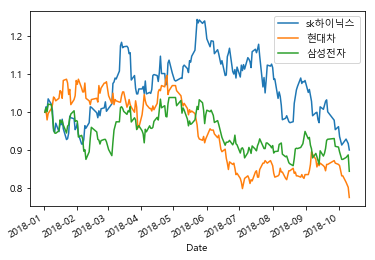

In [82]:
std_price.plot()

In [85]:
std_price.corr()
# sk하이닉스는 삼성전자(0.4) > 현대차(-0.1), 
# 현대차는 sk하이닉스(-0.1) < 삼성전자 (0.6)
# 삼성전자는 sk하이닉스(0.4) < 현대차(0.6)

,sk하이닉스,현대차,삼성전자
sk하이닉스,1.000000,-0.11407,0.415906
현대차,-0.114070,1.00000,0.665970
삼성전자,0.415906,0.66597,1.000000


In [102]:
returns_price.corr()
# sk하이닉스는 삼성전자(0.6) > 현대차(-0.1), 
# 현대차는 sk하이닉스(-0.1) = 삼성전자 (0)
# 삼성전자는 sk하이닉스(0.6) > 현대차(0)

,000660.KS,005380.KS,005930.KS
000660.KS,1.000000,-0.109802,0.635184
005380.KS,-0.109802,1.000000,-0.000139
005930.KS,0.635184,-0.000139,1.000000


In [110]:
# 정규화(normalize) : 수치를 특정 범위에 한정시키셔 비교하는것이 가장 쉽다 
# scikit-learn : 파이선의 머신러닝 모듈
# 전처리 도구를 이용하여 정규화를 진행
# MinMaxScaler(x) = (x - min) / (max - min)
# 각 컬럼별 최대값을 1로 두고 나머지는 상대적으로 계산해서 조정하면 0~1 사이로 모두 구성
# https://blog.naver.com/wideeyed/221293217463 참고
# MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

from sklearn import preprocessing

# 대상 컬럼 획득
col = ['005930.KS', '005380.KS', '000660.KS']
# 정규화 대상 컬럼들의 값 획득
x = price[ col ].values

# 전처리(preprocessing) 모듈의 최대, 최소 스캐너 함수
min_max_scaler = preprocessing.MinMaxScaler()
# 배열 데이터(값만 모여있는)를 float로 변경하여 함수 처리
x_scaled = min_max_scaler.fit_transform( x.astype(float) )


In [106]:
# 정규화된 데이터를 다시 원본데이터 각 컬럼에 대입 or 새로 생성
norm_price = pd.DataFrame(x_scaled, columns=col, index=price.index)

In [107]:
norm_price.head()

,005930.KS,005380.KS,000660.KS
Date,,,
2018-01-02,0.800000,0.697917,0.288973
2018-01-03,0.860606,0.718750,0.330798
2018-01-04,0.806061,0.635417,0.307985
2018-01-05,0.911111,0.687500,0.391635
2018-01-08,0.901010,0.729167,0.349810


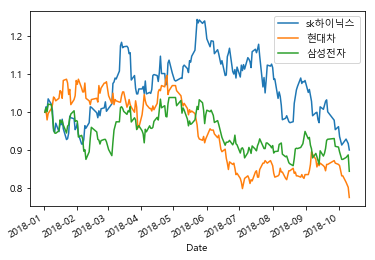

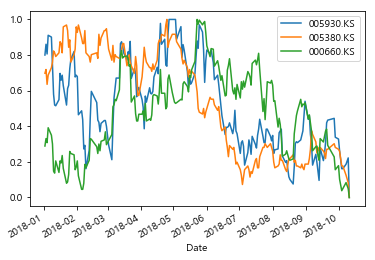

In [112]:
std_price.plot()
plt.show()
norm_price.plot()
plt.show()

In [114]:
norm_price.corr() # std_price.corr()와 동일함.

# sk하이닉스는 삼성전자(0.4) > 현대차(-0.1), 
# 현대차는 sk하이닉스(-0.1) < 삼성전자 (0.6)
# 삼성전자는 sk하이닉스(0.4) < 현대차(0.6)

,005930.KS,005380.KS,000660.KS
005930.KS,1.000000,0.66597,0.415906
005380.KS,0.665970,1.00000,-0.114070
000660.KS,0.415906,-0.11407,1.000000


# 응용 : 관심종목 주가분석

### (1) 코스피 전체 종목코드 받기

### (2) 코스피 전체 종목코드에 대해 주가정보 받기 (생략)

### (3) 알고싶은 종목에 대해서만 주가정보 받기, 엑셀로 종목명 입력해서 종목코드받고 주가정보 받기

### (4) sql DB 또는 csv에 저장

### (5) 데이터 전처리
### (6) 특정일자 주가 변동율 계산

### (7) 특정기간 주가 변동율 계산

### (8) 결과정리, 엑셀파일로 생성


In [45]:
# from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import pandas_datareader as pdr
#import fix_yahoo_finance as yf

#yf.pdr_override()

import FinanceDataReader as fdr

# 종목코드얻기
# KRX 종목전체, KOSPI 코스피종목, KOSDAQ 코스닥종목
stock_code= fdr.StockListing('KRX')
print('종목개수:', len(stock_code))
stock_code.head()

종목개수: 2216


,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입"
2,012630,HDC,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업"
3,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
4,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"


In [46]:
print(type(stock_code['Symbol']))
stock_code['Symbol'].head()

<class 'pandas.core.series.Series'>


0    001040
1    011150
2    012630
3    082740
4    001390
Name: Symbol, dtype: object

In [48]:
# 종목 필터링, 원하는 종목에 대해서만 처리, '종목명'으로 찾기
# 종목명 엑셀파일 읽어들여 코드 리스트 생성
# 에러날경우 어떤 종목명이 틀렸는지 확인 가능해야함.
# 로드 (csv -> pandas의 자료구조 DataFrame으로 획득)

stock_name= pd.read_excel('./관심종목.xlsx')
# 읽을때 index_col을 이용하여 0번을 배제하고 로드
#crime_data_raw = pd.read_csv('./data/tmp_1.csv', encoding='utf-8', index_col=0)

stock_name.tail(5)

,종목명
142,계양전기
143,코오롱인더
144,한국자산신탁
145,케이엘넷
146,디피씨


In [49]:
# 관심종목에 대한 종목코드를 찾아서 딕셔너리에 담는다.

match_code_dict={}

for i in range(len(stock_name)):
    cantfind = 1
    for j in range(len(stock_code)):
        if stock_name['종목명'][i] == stock_code['Name'][j]: # 지정 종목에 대한 코드를 찾는다.
            #print('find', stock_name['종목명'][i], stock_code['Symbol'][j])
            match_code_dict[stock_code['Symbol'][j]]= stock_name['종목명'][i] #딕셔너리 형태로 코드와 종목을 저장한다.
            cantfind= 0
            break
    if cantfind == 1:
        print('%s를 찾을수없습니다.' %stock_name['종목명'][i]) # 종목찾기 실패시 에러메시지 발생

In [50]:
print('종목개수:', len(match_code_dict))
print(match_code_dict)

종목개수: 144
{'035250': '강원랜드', '008560': '메리츠종금증권', '067900': '와이엔텍', '151860': 'KG ETS', '102260': '동성코퍼레이션', '004380': '삼익THK', '016800': '퍼시스', '058730': '다스코', '122450': 'KMH', '127710': '아시아경제', '029960': '코엔텍', '023590': '다우기술', '229640': 'LS전선아시아', '268280': '미원에스씨', '181710': 'NHN엔터테인먼트', '034310': 'NICE', '251270': '넷마블', '216050': '인크로스', '089600': '나스미디어', '230360': '에코마케팅', '003960': '사조대림', '065510': '휴비츠', '183300': '코미코', '000050': '경방', '272290': '이녹스첨단소재', '090460': '비에이치', '178920': 'SKC코오롱PI', '003690': '코리안리', '108670': 'LG하우시스', '078930': 'GS', '002350': '넥센타이어', '161390': '한국타이어', '044960': '이글벳', '267250': '현대중공업지주', '005090': '삼광글라스', '030200': '케이티', '004780': '대륙제관', '040610': 'SG&G', '222980': '한국맥널티', '000880': '한화', '051910': 'LG화학', '004960': '한신공영', '042110': '에스씨디', '067010': '이씨에스', '040910': '아이씨디', '170030': '현대공업', '034020': '두산중공업', '149980': '하이로닉', '008470': '부스타', '002170': '삼양통상', '023810': '인팩', '114090': 'GKL', '126700': '하이비젼시스템', '234080': 'JW

In [51]:
# FinanceDataReader (또는 pandas_datareader)를 사용하여 주가데이터를 다운로드받는다.
# 각 종목에 대한 주가데이터는 데이터프레임형태로 딕셔너리에 저장된다. 

all_data= {}
for ticker in match_code_dict.keys():
    #all_data[ticker]= pdr.data.get_data_yahoo(ticker+'.KS', '2018-06-01', '2018-10-11')
    all_data[match_code_dict[ticker]]= fdr.DataReader(ticker, '2018-10-01') #2018-10-19일까지 실행

In [55]:
# SQLite DB에 저장 (DB Browser for SQLite 설치)
import sqlite3

con= sqlite3.connect('./krx_stock_data.db')
#for i in all_data.keys():
for ticker in match_code_dict.keys():
    all_data[match_code_dict[ticker]].to_sql(match_code_dict[ticker], con, if_exists='replace')

In [66]:
# SQLite DB에서 불러오기

# str_name='삼성전자'
# readed_df= pd.read_sql("SELECT * From '%s'" %str_name, con, index_col='Date')
# readed_df.head(5)

all_data_sql= {}
for ticker in match_code_dict.keys():
    all_data_sql[match_code_dict[ticker]]= pd.read_sql("SELECT * From '%s'" %match_code_dict[ticker], con, index_col='Date')
#all_data_sql

dict

In [68]:
#print({len(all_data[match_code_dict[i]]) for i in all_data.keys()}) # 데이터 길이가 모두 다르다?
all_data_length=[]
for i in all_data.keys():
    print(len(all_data[i]), ',', end='')
    all_data_length.append(len(all_data[i]))

17 ,18 ,19 ,16 ,16 ,18 ,16 ,18 ,16 ,18 ,20 ,18 ,16 ,16 ,16 ,16 ,21 ,16 ,16 ,20 ,17 ,16 ,16 ,16 ,19 ,19 ,18 ,18 ,16 ,19 ,16 ,17 ,19 ,18 ,16 ,21 ,17 ,19 ,17 ,20 ,22 ,17 ,17 ,16 ,17 ,16 ,19 ,20 ,17 ,17 ,16 ,16 ,19 ,16 ,16 ,17 ,19 ,17 ,18 ,17 ,19 ,18 ,16 ,17 ,17 ,17 ,20 ,16 ,16 ,22 ,16 ,19 ,17 ,18 ,16 ,19 ,19 ,16 ,16 ,16 ,17 ,19 ,17 ,19 ,16 ,17 ,20 ,16 ,18 ,18 ,18 ,16 ,18 ,19 ,16 ,18 ,16 ,17 ,19 ,16 ,20 ,18 ,16 ,18 ,16 ,18 ,19 ,16 ,16 ,19 ,18 ,17 ,16 ,17 ,18 ,16 ,16 ,16 ,16 ,16 ,17 ,16 ,16 ,18 ,16 ,14 ,16 ,20 ,17 ,22 ,21 ,20 ,20 ,22 ,18 ,18 ,21 ,16 ,16 ,16 ,18 ,16 ,19 ,17 ,

In [84]:
# 거래정지종목 지우기
for i in all_data.keys():
    if len(all_data[i])== min(all_data_length):
        print(i, len(all_data[i]))

all_data['효성티앤씨']

효성티앤씨 14


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-10-01,183500,187000,187000,179500,20850.0,-0.0134
2018-10-02,184000,183500,184000,180500,18570.0,0.0027
2018-10-04,175500,183000,184500,174500,34840.0,-0.0462
2018-10-05,176500,175500,176500,169000,24140.0,0.0057
2018-10-08,175500,174500,177000,171500,21660.0,-0.0057
2018-10-10,170000,176500,176500,165500,23880.0,-0.0313
2018-10-11,160500,160500,167000,160000,35960.0,-0.0559
2018-10-12,165500,158500,167000,158500,16130.0,0.0312
2018-10-15,160000,162000,165500,159500,11320.0,-0.0332


In [78]:
all_data['펄어비스'].tail(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-10-12,206700,197500,207600,197400,46770.0,0.0471
2018-10-14,206700,206700,206700,206700,0.0,0.0000
2018-10-15,205500,208500,208500,202100,29650.0,-0.0058
2018-10-16,206900,204100,211300,204100,23820.0,0.0068
2018-10-17,208400,208900,211900,205800,15540.0,0.0072
2018-10-18,207000,208000,208100,204100,27180.0,-0.0067
2018-10-19,213000,204500,213500,204000,32490.0,0.0290
2018-10-22,215000,209500,215700,208600,28520.0,0.0094
2018-10-23,217600,215100,220000,212900,43420.0,0.0121


In [90]:
price= pd.DataFrame({tic:data['Close'] for tic, data in all_data.items()})
change= pd.DataFrame({tic:data['Change'] for tic, data in all_data.items()})

In [91]:
# 컬럼 순서 바꾸기
price= price[list(match_code_dict.values())]
change= change[list(match_code_dict.values())]

In [92]:
print(len(price))
print(len(change))

22
22


In [93]:
price.tail(10)

,강원랜드,메리츠종금증권,와이엔텍,KG ETS,동성코퍼레이션,삼익THK,퍼시스,다스코,KMH,아시아경제,...,BNK금융지주,DGB금융지주,한국항공우주,아이쓰리시스템,휴니드테크놀러지스,계양전기,코오롱인더,한국자산신탁,케이엘넷,디피씨
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-15,28450.0,3795.0,4695.0,3445.0,5430.0,12800.0,29800.0,7260.0,7450.0,2215.0,...,7990.0,10200.0,31350.0,17600.0,8170.0,3440.0,58700.0,5000.0,2810.0,6140.0
2018-10-16,28800.0,3795.0,4670.0,3495.0,5500.0,13200.0,29850.0,7230.0,7550.0,2270.0,...,7990.0,10200.0,31600.0,18000.0,8150.0,3480.0,58100.0,4980.0,2950.0,6110.0
2018-10-17,29550.0,3850.0,4800.0,3515.0,5520.0,13150.0,30100.0,7380.0,7840.0,2320.0,...,8040.0,10250.0,32200.0,17600.0,8290.0,3495.0,57800.0,4980.0,3035.0,5690.0
2018-10-18,29600.0,3840.0,4735.0,3540.0,5450.0,13150.0,30000.0,7340.0,8000.0,2335.0,...,7970.0,9910.0,32200.0,17950.0,8340.0,3520.0,57500.0,4850.0,2905.0,5270.0
2018-10-19,29450.0,3825.0,4945.0,3495.0,5320.0,13550.0,29800.0,7380.0,7860.0,2310.0,...,7880.0,9900.0,32150.0,17850.0,8560.0,3560.0,57500.0,4850.0,2950.0,5550.0
2018-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-22,30150.0,4000.0,4920.0,3440.0,5390.0,13450.0,29800.0,7100.0,7810.0,2320.0,...,7840.0,9820.0,31650.0,19000.0,8570.0,3550.0,57500.0,4860.0,2965.0,5200.0
2018-10-23,29800.0,3910.0,4620.0,3295.0,5420.0,12700.0,29800.0,6840.0,7700.0,2230.0,...,7760.0,9680.0,30950.0,18750.0,8460.0,3525.0,55400.0,4705.0,2950.0,6200.0
2018-10-24,29600.0,4020.0,4320.0,3245.0,5350.0,12550.0,30000.0,6770.0,7490.0,2240.0,...,7980.0,9730.0,31150.0,18350.0,8450.0,3440.0,55300.0,4590.0,2715.0,6230.0


In [158]:
print(price.loc['2018-10-23'][price.loc['2018-10-23'].isnull()])
print(price.loc['2018-10-24'][price.loc['2018-10-24'].isnull()])

효성첨단소재   NaN
효성티앤씨    NaN
Name: 2018-10-23 00:00:00, dtype: float64
효성첨단소재   NaN
효성티앤씨    NaN
Name: 2018-10-24 00:00:00, dtype: float64


In [159]:
print(price['메리츠종금증권'].tail())
print(price['효성티앤씨'].tail())

Date
2018-10-21       NaN
2018-10-22    4000.0
2018-10-23    3910.0
2018-10-24    4020.0
2018-10-25       NaN
Name: 메리츠종금증권, dtype: float64
Date
2018-10-21         NaN
2018-10-22    176000.0
2018-10-23         NaN
2018-10-24         NaN
2018-10-25         NaN
Name: 효성티앤씨, dtype: float64


In [161]:
price['효성티앤씨'][-3:]=  price['효성티앤씨'][-4]
price['효성첨단소재'][-3:]=  price['효성첨단소재'][-4]
print(price['효성티앤씨'].tail())
print(price['효성첨단소재'].tail())

Date
2018-10-21         NaN
2018-10-22    176000.0
2018-10-23    176000.0
2018-10-24    176000.0
2018-10-25    176000.0
Name: 효성티앤씨, dtype: float64
Date
2018-10-21         NaN
2018-10-22    117500.0
2018-10-23    117500.0
2018-10-24    117500.0
2018-10-25    117500.0
Name: 효성첨단소재, dtype: float64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [162]:
# NaN 값 들어있는 행 지우기
for i in price.columns:    
    nanIdx= price[price[i].isnull()].index

    if len(nanIdx) > 0:
        price.drop(list(nanIdx), inplace=True)
    else:
        print('NaN없음 ', end='')

NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 NaN없음 

In [163]:
price.tail()

,강원랜드,메리츠종금증권,와이엔텍,KG ETS,동성코퍼레이션,삼익THK,퍼시스,다스코,KMH,아시아경제,...,BNK금융지주,DGB금융지주,한국항공우주,아이쓰리시스템,휴니드테크놀러지스,계양전기,코오롱인더,한국자산신탁,케이엘넷,디피씨
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-18,29600.0,3840.0,4735.0,3540.0,5450.0,13150.0,30000.0,7340.0,8000.0,2335.0,...,7970.0,9910.0,32200.0,17950.0,8340.0,3520.0,57500.0,4850.0,2905.0,5270.0
2018-10-19,29450.0,3825.0,4945.0,3495.0,5320.0,13550.0,29800.0,7380.0,7860.0,2310.0,...,7880.0,9900.0,32150.0,17850.0,8560.0,3560.0,57500.0,4850.0,2950.0,5550.0
2018-10-22,30150.0,4000.0,4920.0,3440.0,5390.0,13450.0,29800.0,7100.0,7810.0,2320.0,...,7840.0,9820.0,31650.0,19000.0,8570.0,3550.0,57500.0,4860.0,2965.0,5200.0
2018-10-23,29800.0,3910.0,4620.0,3295.0,5420.0,12700.0,29800.0,6840.0,7700.0,2230.0,...,7760.0,9680.0,30950.0,18750.0,8460.0,3525.0,55400.0,4705.0,2950.0,6200.0
2018-10-24,29600.0,4020.0,4320.0,3245.0,5350.0,12550.0,30000.0,6770.0,7490.0,2240.0,...,7980.0,9730.0,31150.0,18350.0,8450.0,3440.0,55300.0,4590.0,2715.0,6230.0


In [164]:
change.tail()

,강원랜드,메리츠종금증권,와이엔텍,KG ETS,동성코퍼레이션,삼익THK,퍼시스,다스코,KMH,아시아경제,...,BNK금융지주,DGB금융지주,한국항공우주,아이쓰리시스템,휴니드테크놀러지스,계양전기,코오롱인더,한국자산신탁,케이엘넷,디피씨
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-22,0.0238,0.0458,-0.0051,-0.0157,0.0132,-0.0074,0.0000,-0.0379,-0.0064,0.0043,...,-0.0051,-0.0081,-0.0156,0.0644,0.0012,-0.0028,0.0000,0.0021,0.0051,-0.0631
2018-10-23,-0.0116,-0.0225,-0.0610,-0.0422,0.0056,-0.0558,0.0000,-0.0366,-0.0141,-0.0388,...,-0.0102,-0.0143,-0.0221,-0.0132,-0.0128,-0.0070,-0.0365,-0.0319,-0.0051,0.1923
2018-10-24,-0.0067,0.0281,-0.0649,-0.0152,-0.0129,-0.0118,0.0067,-0.0102,-0.0273,0.0045,...,0.0284,0.0052,0.0065,-0.0213,-0.0012,-0.0241,-0.0018,-0.0244,-0.0797,0.0048
2018-10-25,-0.0203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.0225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
print(len(price))
print(len(change))

16
22


In [73]:
#change_re= pd.DataFrame(change.iloc[-1]*100)

change_re= pd.DataFrame(change.values.T, index=change.columns, columns=change.index)
change_re[change_re.columns[-7:]]
change_re= change_re[change_re.columns[-7:]]*100
change_re

Date,2018-10-12 00:00:00,2018-10-14 00:00:00,2018-10-15 00:00:00,2018-10-16 00:00:00,2018-10-17 00:00:00,2018-10-18 00:00:00,2018-10-19 00:00:00
강원랜드,-2.49,NaN,3.64,1.23,2.60,0.17,-0.51
메리츠종금증권,1.86,NaN,-0.91,0.00,1.45,-0.26,-0.39
와이엔텍,2.04,0.0,4.33,-0.53,2.78,-1.35,4.44
KG ETS,1.95,NaN,1.32,1.45,0.57,0.71,-1.27
동성코퍼레이션,-0.18,NaN,-0.18,1.29,0.36,-1.27,-2.39
삼익THK,6.20,0.0,-0.39,3.13,-0.38,0.00,3.04
퍼시스,1.18,NaN,-0.83,0.17,0.84,-0.33,-0.67
다스코,0.00,NaN,2.83,-0.41,2.07,-0.54,0.54
KMH,3.72,NaN,-0.93,1.34,3.84,2.04,-1.75
아시아경제,-1.81,0.0,2.31,2.48,2.20,0.65,-1.07


In [77]:
change_re.to_excel('./종목분석결과.xlsx')

In [40]:
# 특정기간의 수익률을 구한다.
# 수익률 내림차순정렬후
# 그래프 분석
# 코스피 지수대비 선방하는 종목들 찾을수있음.



산술평균: 8.75 기하평균: 8.408964152537145


In [ ]:
### 다음 주제, 증권사 api이용해서 주가받기, 틱데이터까지 받기
### 다음 주제, 머신러닝관련, 주가 예측방법 기본, 백테스팅방법, 선행연구 찾아서 정리 